In [4]:
%load_ext autoreload
%autoreload 2


import numpy as np
import sys

import matplotlib.pyplot as plt   
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

plt.rcParams.update({"axes.grid" : True, "grid.color": "black", "grid.alpha":"0.25", "grid.linestyle": "--"})
plt.rcParams.update({'font.size': 14})

from IHANKModel import IHANKModelClass
import figures 
import calculations

run_test = False
path = '/Users/emmagundersen/Desktop/Current code/I_HANK_PIG/fig/0403/'
lvl_path = ['U_hh', 'Walras', 'CB', 'i', 'NX', 'CA', 'ra', 'iF_s',  'iF_s']
path_philips= ['WTH', 'WNT', 'NTH', 'NNT', 'PTH', 'PNT', 'PF', 'UC_TH_hh', 'UC_NT_hh', 'EX']
paths = ['PE_s', 'PE', 'YH',  'W', 'P', 'w', 'tau',  'N', 'INC', 'inc',  'CT', 'CNT', 'p', 'E', 'PF_s', 'PF', 'CTH_s', 'i', 'ra', 'iF_s']

target_var = ['PE_s', 'PE', 'p', 'inc_NT', 'inc_TH', 'ra', 'i', 'Q']



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
model = IHANKModelClass(name='baseline')
model.par.nu = 2.0
model.par.eta_s = 0.5 
model.par.etaF = 0.5
model.par.etaE = 0.1
model.par.gamma_ = model.par.epsilon_
# model.par.epsilon_ = 0.0 # for homothetic preferences
model.par.float = True
model.par.pf_fixed = False
model.par.mon_policy = 'real'
model.par.phi_inflation = 1.5

model.find_ss(do_print=False)
model.compute_jacs()

shock_PE_s, shock_forigne_interest, shock_PF_s, shock_PF_s_taylor, shock_PE_PF, shock_PE_PF_taylor, shock_i = calculations.difine_shocks(model) 


Share of domestic workers in tradable sector = 0.50


### varnames ###


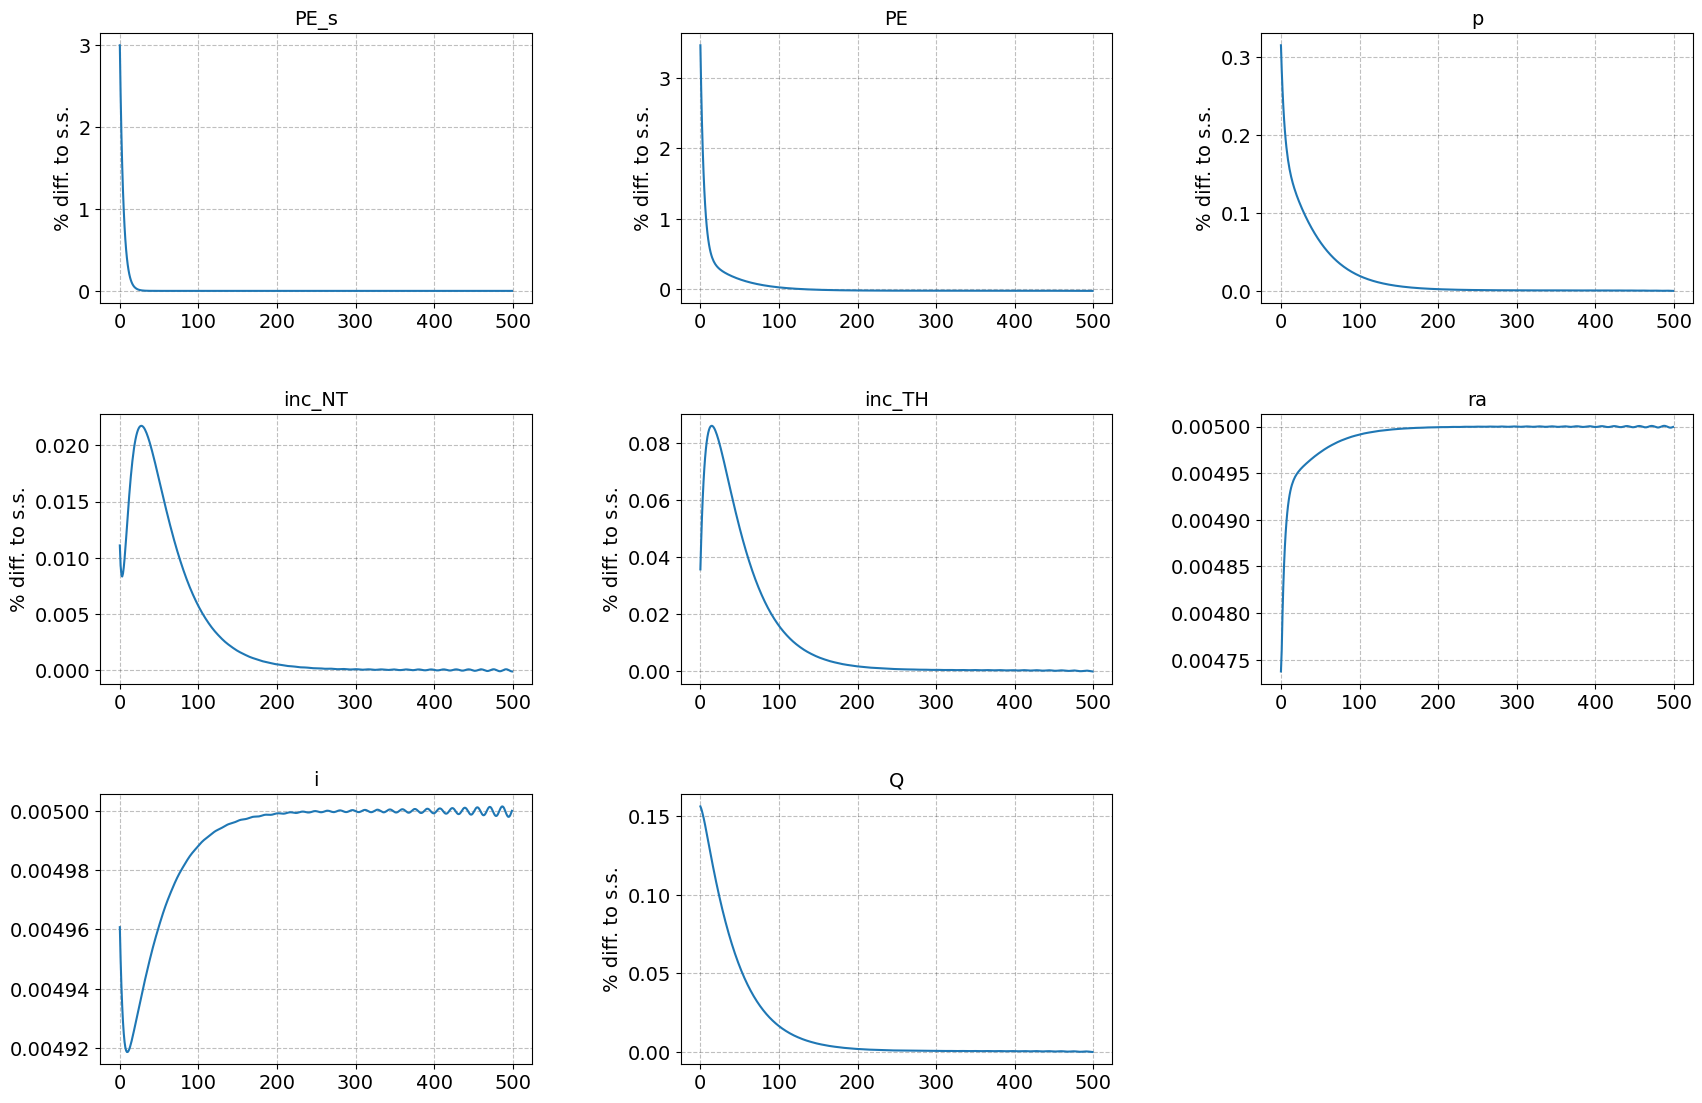


### tagets ###


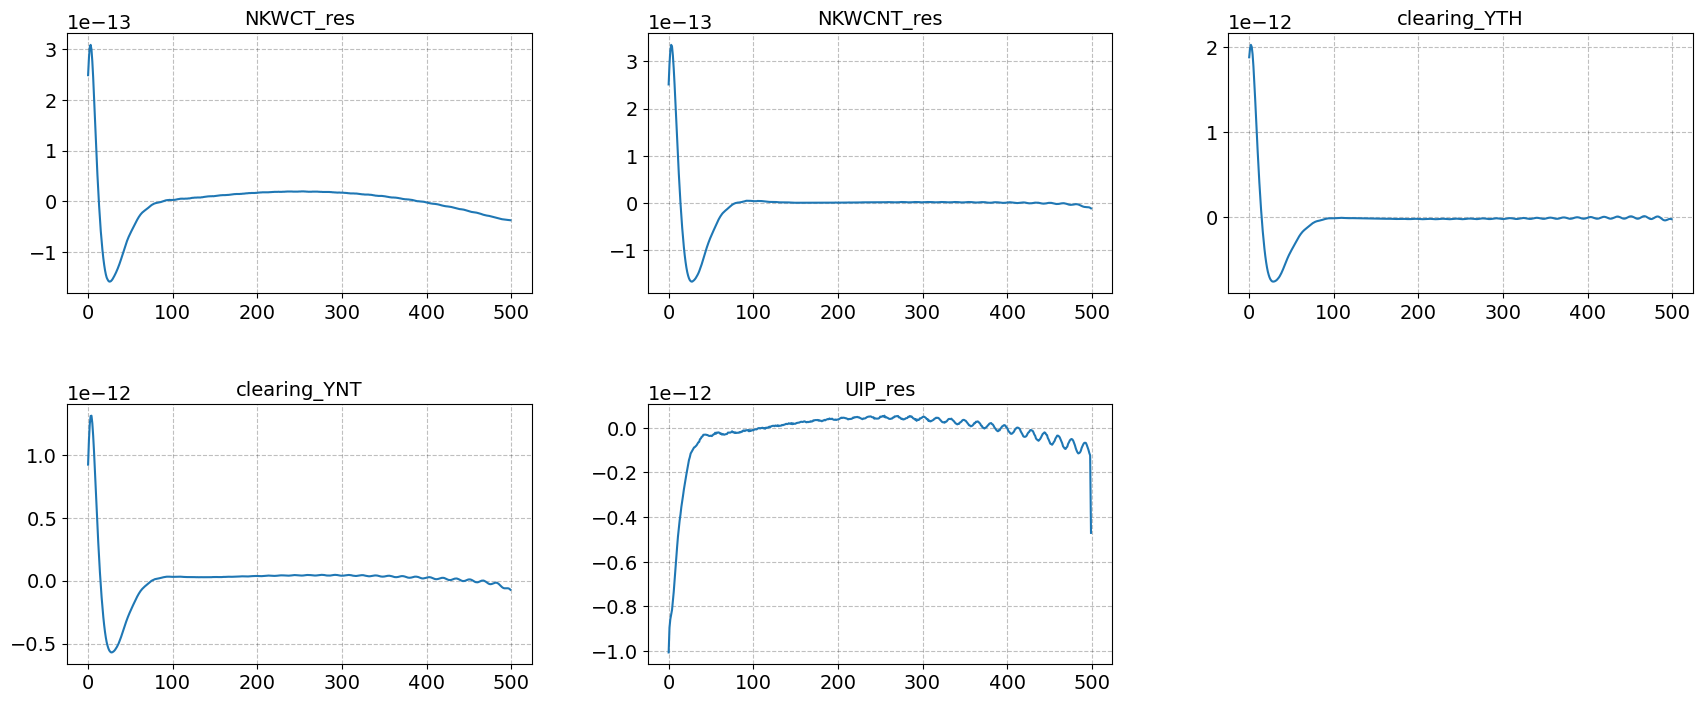

In [12]:
model_float = model.copy(name='Floating exchange rate')
model_float.find_transition_path(shocks=shock_PE_s, do_end_check=False)
model_float.show_IRFs(paths, T_max=500, ncols=3, lvl_value=lvl_path, do_shocks=False, do_targets=False)
model_float.show_IRFs(target_var, T_max=500, ncols=3, lvl_value=lvl_path, do_shocks=False, do_targets=True)

Text(0.5, 1.0, 'Prices')

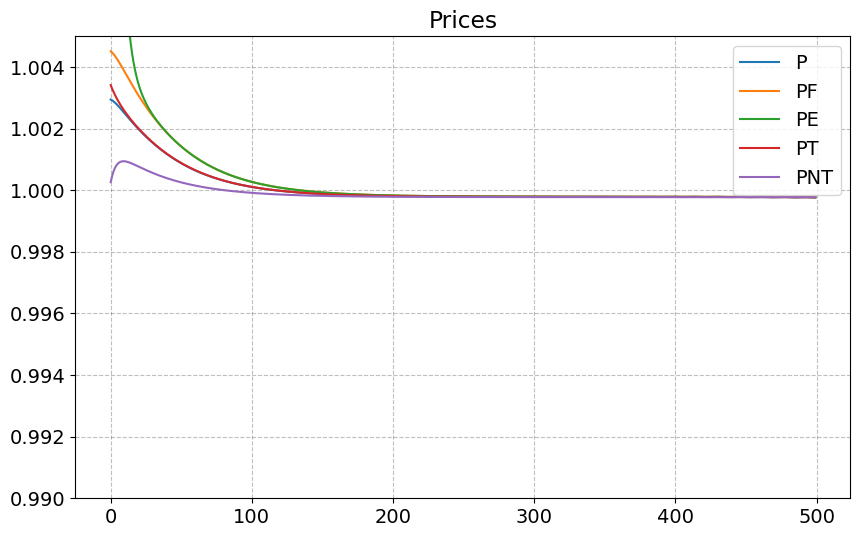

In [15]:

# Ploting prices: 
P = model_float.path.P
PF = model_float.path.PF
PE = model_float.path.PE
PF_s = model_float.path.PF_s
PE_s = model_float.path.PE_s
PT = model_float.path.PT
PNT = model_float.path.PNT
E = model_float.path.E

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.plot(P, label='P')
ax.plot(PF, label='PF')
ax.plot(PE, label='PE')
ax.plot(PT, label='PT')
ax.plot(PNT, label='PNT')

# ax.plot(PF_s, label='PF_s')
# ax.plot(PE_s, label='PE_s')
# ax.plot(E, label='E')
ax.legend()
ax.set_ylim(0.99, 1.005)
ax.set_title('Prices')

